<a href="https://colab.research.google.com/github/mahausmani/deep_learning/blob/main/introduction-to-dl-labs2023/lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 316 : Introduction to Deep Learning
## Lab 07 : Multi Layer Perceptron
### Dr. Abdul Samad

# Instructions
1. Please rename your notebook as *Lab_7_aa1234.ipynb* before the final submission. Notebooks which do not follow appropriate naming convention will not be graded.

2. Filling out the feedback form on Canvas is mandatory. Failure to do so will result in you losing 10% of your grade for this lab.

3. You have one week to submit this lab. Late submissions will be graded with a 30% penalty. No submission will be accepted after two weeks.

4. Please submit your own work. If you have any questions, please feel free to reach out to the course instructor , RA or TA.


# Setup

In [ ]:
# Import numpy using the alias np
import numpy as np
# Set random seed for numpy to obtain reproducability
np.random.seed(42)
# Import matplotlib.pyplot using the alias plt
import matplotlib.pyplot as plt
%matplotlib inline
# Import the data loaders for the CIFAR10 and Fashion_MNIST Dataset
from keras.datasets import cifar10,fashion_mnist
# Import trange
from tqdm import trange
# Import clear_output
from IPython.display import clear_output

# Overview

In this notebook, we are going to build a neural network(multilayer perceptron) using numpy and successfully train it to perform image classification. Deep learning is a vast topic, but we got to start somewhere, so let's start with the very basics of a neural network which is Multilayer Perceptron.

---

<h2>What is a neural network?</h2>
A neural network is a type of machine learning model which is inspired by our neurons in the brain where many neurons are connected with many other neurons to translate an input to an output. Mostly we can look at any machine learning model and think of it as a function which takes an input and produces the desired output; it's the same with a neural network.

---
<h2>What is a Multilayer Perceptron ?</h2>

Multi-layer perceptron is a type of network where multiple layers of a group of perceptron are stacked together to make a model. Before we jump into the concept of a layer and multiple perceptrons, let's start with the building block of this network which is a perceptron. Think of perceptron/neuron as a linear model which takes multiple inputs and produce an output. In our case perceptron is a linear model which takes a bunch of inputs multiply them with weights and add a bias term to generate an output.

$$ Z = \vec {w} \cdot X + b $$



<center>

<img src="https://raw.githubusercontent.com/aayushmnit/Deep_learning_explorations/master/1_MLP_from_scratch/perceptron.png" align='center'>
<center/>


<center>Fig 1: Perceptron Image<center/>


<center>Image credit=https://commons.wikimedia.org/wiki/File:Perceptron.png<center/>


Now, if we stack a bunch of these perceptrons together, it becomes a hidden layer which is also known as a Dense layer in modern deep learning terminology.

$$f(X)=X \cdot W + \vec{b}$$
where bias term is now a vector and W is a weight matrix

<center>
<img src="https://raw.githubusercontent.com/aayushmnit/Deep_learning_explorations/master/1_MLP_from_scratch/single_layer_mlp.png" align ='center'>
</center>


<center>Fig 2: Single dense layer perceptron network</center>


<center>Image credit=http://www.texample.net/tikz/examples/neural-network/
</center>

Now we understand dense layer let's add a bunch of them, and that network becomes a multi-layer perceptron network.

<img src="https://raw.githubusercontent.com/aayushmnit/Deep_learning_explorations/master/1_MLP_from_scratch/multi_layer_mlp.png" align ='center'>

<center>Fig 3: Multi layer perceptron network<center/>
<center>Image credit=http://pubs.sciepub.com/ajmm/3/3/1/figure/2<center/>


If you have noticed our dense layer, only have linear functions, and any combination of linear function only results in the linear output. As we want our MLP to be flexible and learn non-linear decision boundaries, we also need to introduce non-linearity into the network. We achieve the task of introducing non-linearity by adding activation function. There are various kinds of activation function which can be used, but we will be implementing Rectified Linear Units(ReLU) and Sigmoid which are one of the popular activation functions.

ReLU function is a simple function which is zero for any input value below zero and the same value for values greater than zero.

$$f(X) = max(0,X)$$

A sigmoid function is a bounded, differentiable, real function that is defined for all real input values and has a non-negative derivative at each point and exactly one inflection point.

$$f(X) = \frac{1}{1+\exp{(-x)}} $$

Now, we understand dense layer and also understand the purpose of activation function, the only thing left is training the network. For training a neural network we need to have a loss function and every layer should have a **feed-forward loop** and **backpropagation loop**. Feedforward loop takes an input and generates output for making a prediction and backpropagation loop helps in training the model by adjusting weights in the layer to lower the output loss. In backpropagation, the weight update is done by using backpropagated gradients using the chain rule and optimized using an optimization algorithm. In our case, we will be using SGD(stochastic gradient descent).

---

So, to summarize a neural network needs few building blocks

- Dense layer - a fully-connected layer, $f(X)=W \cdot X + \vec{b}$
- ReLU / Sigmoid Layer (or any other activation function to introduce non-linearity)
- Loss function - (crossentropy in case of multi-class classification problem)
- Backprop algorithm - a stochastic gradient descent with backpropageted gradients

We will be approaching one at a time

# Task Overview

We will implement each of these modules separately in Numpy and then combine them to form a Multi Layer Perceptron. Each layer will have a forward pass and backward pass. So let's create a base class `Layer` which will have a forward pass and backward pass, and each class will inherit this base class.

In [ ]:
# DO NOT EDIT
class Layer:
    """
    A building block. Each layer is capable of performing two things:

    - Process input to get output:           output = layer.forward(input)

    - Propagate gradients through itself:    grad_input = layer.backward(input, grad_output)

    Some layers also have learnable parameters which they update during layer.backward.
    """
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass

    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        """
        Performs a backpropagation step through the layer, with respect to the given input.

        To compute loss gradients w.r.t input, we need to apply chain rule (backprop):

        d loss / d x  = (d loss / d layer) * (d layer / d x)

        Luckily, we already receive d loss / d layer as input, so you only need to multiply it by d layer / d x.

        If our layer has parameters (e.g. dense layer), we also need to update them here using d loss / d layer
        """
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]

        d_layer_d_input = np.eye(num_units)

        return np.dot(grad_output, d_layer_d_input) # chain rule

## [20 Points] Task 01: Activation Function

In this task, you are to required to implement the ReLU and Sigmoid activation function by completing the `ReLU` and `Sigmoid` classes.

### [10 Points] Part A: ReLU (Rectified Linear Unit)

The ReLU function is defined as
$$ f(x) = \max{(x,0)} $$

The derivative of the ReLU function is defined as
$$ f^{\prime} {(x)} = \begin{cases} 0  & x < 0 \\ 1 & x > 0  \end{cases} $$

In [ ]:
#TODO: Complete the ReLU Class
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        # Does nothing
        pass

    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward =
        return relu_forward

    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = ...
        return grad_output*relu_grad

### [10 Points] Part B: Sigmoid

The Sigmoid function is defined as
$$ f(x) = \frac{1}{1+\exp({-x})} $$

The derivative of the Sigmoid function is equal to
$$ f^{\prime}(x) = \frac{ \exp{(-x)}  }{{(1+\exp({-x}))}^2}= f(x) (1 -f(x))$$

In [ ]:
# TODO: Complete the Sigmoid Class
class Sigmoid(Layer):
    def __init__(self):
        """Sigmoid layer simply applies sigmoid activation function to all inputs"""
        # Does nothing
        pass

    def forward(self, input):
        """Apply elementwise sigmoid to [batch, input_units] matrix"""
        sigmoid_forward = ...
        return sigmoid_forward

    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. Sigmoid input"""
        sigmoid_grad = ...
        return grad_output*sigmoid_grad


## [40 Points] Task 02: Dense Layer


A dense layer applies affine transformation. In a vectorized form, it can be described as:
$$f(X)= X \cdot W + \vec b $$
where $X$ is an object-feature matrix of shape `[batch_size, num_features]`, $W$ is a weight matrix `[num_features, num_outputs]` and $b$ is a vector of num_outputs biases.

Both $W$ and $b$ are initialized during layer creation and updated each time backward is called. In order to train our model to converge faster **Xavier initialization**  is used. Instead of initializing our $W$ with small numbers which are distributed randomly we initialize our weights with $\mu=0$ and $\sigma^2 = \frac{2}{\text{Number of inputs} + \text{Number of outputs}} $ .

Furthemore, we intialize the bias vector $b$ as a vector of zeros.


---
The derivative of the loss $\mathcal{l}$ with respect to the input is defined as
$$ \frac{d\mathcal{l}}{ d x}  = \frac{d \mathcal{l}} {d L} \cdot \frac{dL} { d\mathcal{x}} $$

where $\frac{d \mathcal{l}} {d L}$ is the derivative of layer $(L)$ with respect to  loss $\mathcal{L}$ and $\frac{dL} { d\mathcal{x}}$ is the derivative of Layer $(L)$ with respect to the input $x$.

In case of the dense layer, $\frac{dL} { d\mathcal{x}} = W^\top$.

The gradient of weights $W$ with respect to the input is defined as
$$ \frac{d \mathcal{l}}{d W} = \frac{1}{m} X^{\top} \cdot \frac{d \mathcal{l}} {d L} $$

The gradient of biases $b$ with respect to the input is defined as the sum of each columm for $\frac{d \mathcal{l}} {d L}$ and then divide this sum by number of samples $m$


Hint: In the `backward` method provided by the `Dense` class, $\frac{d \mathcal{l}} {d L}$ is denoted by the parameter `grad_output`

In this task, you are required to implement the Dense Layer by completing the `Dense` class

In [ ]:
#TODO: Complete the Dense class
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.01):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = <X,W> + b
        """
        # Initialize learning_rate,weights and biases

        self.learning_rate = ...
        self.weights = ...
        self.biases = ...


    def forward(self,input):
        """
        Perform an affine transformation:
        f(x) = <X,W> + b

        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        # Perform an affine transformation on the input.
        output = ...
        return output

    def backward(self,input,grad_output):
        """
        Computes the gradient of the input w.r.t to the loss function.
        Computes the gradient of the weights and bias w.r.t to the loss function.
        """
        # Compute (d Loss / d input) = (d Loss / d dense) \cdot (d dense / d input)
        # (d Loss / d input) = grad_input
        # (d Loss / d dense) = grad_output
        # d (dense/ d input) = W.T
        grad_input = ...

        # Compute gradient w.r.t. weights
        # <input.T,grad_output>/input.shape[0]
        grad_weights = ...

        # Compute gradient w.r.t biases
        # Column wise sum grad_out and divided that by input.shape
        grad_biases = ...


        # Assert statement to check if dimensions match
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape

        # Update weight
        # w_new = w_old - lr * dw
        self.weights = ...

        # b_new = b_old - lr * db
        self.biases = ...


        return grad_input

## [10 Points] Task 03: Cross Entropy Loss Function

The Cross Entropy Loss function is defined as
$$ {l}(y,\hat{y}) = -\frac{1}{m} \sum_{i=1}^{q} y_i \log{(\hat{y}_i)}  $$
where $q$ is the number of classes.

---
The derivative of the Softmax activation function is defined as
$$ \frac{\delta l(y,\hat{y})}{\delta o_j} = \frac{\exp{o_j}}{\sum_{i=1}^{q} \exp{(o_i)}} - y_j = softmax(o_j) - y_j$$
where $q$ is the number of classes.

In this section, you are required to implement the cross entropy loss function and compute the derivative of the softmax function with respect to the cross entropy loss by completing the functions `cross_entropy_loss` and `grad_cross_entropy_loss`. You also need to implement the `softmax` and `one_hot` functions.

In [ ]:
# TODO: Implement the softmax and one_hot encoding
def softmax(z):
  """
  Computes the softmax activation function on the linear part
  """
  probs = ...
  return probs

def one_hot(y,c):
  """
  Computes one hot encoding of the label vector.
  """

  y_hot = ...
  return y_hot


In [ ]:
# TODO: Implement the cross entropy loss function
def cross_entropy_loss(logits,y):
  """
  Computes the cross entropy loss using logits and y.
  """
  y_hat = softmax(logits)
  y_hot = one_hot(y,10)
  loss = ...
  return loss

In [ ]:
# TODO: Compute the gradient of the softmax activation function with respect to the cross entropy loss function
def softmax_grad(logits,y):
  """
  Compute gradient of the softmax activation function w.r.t cross entropy loss
  """
  y_hat = softmax(logits)
  y_hot = one_hot(y,10)
  grad = ...
  return grad


## [30 Points] Task 04: MLP

In this task, you are required to implement the class `MLP` which implements the forward and backward pass as well as computes the predictions from the model.

In [ ]:
class MLP:
  """
  Wrapper class for the mulit-layer perceptron which implements the forward and backward pass as well as computes the predictions.
  """
  def __init__(self,n) -> None:
      self.network = n
  def forward(self, X):
    """
    Compute activations of all network layers by applying them sequentially.
    Return a list of activations for each layer.
    """
    activations = []
    input = X
    # Looping through each layer
    for l in self.network:
        # Append output of layer l to the activation list
        ...
        # Updating input to last layer output
        input = ...

    assert len(activations) == len(self.network)
    return activations
  def predict(self,X):
      """
      Compute network predictions. Returning indices of largest Logit probability
      """
      # Compute the forward pass for X and get the ouput from the last activation layer (logits)
      logits = ...
      # Pass the logits to the softmax activation and return the indice of the component with highest probablilty
      predicted_label = ...
      return  predicted_label


  def train(self,X,y):
      """
      Train our network on a given batch of X and y.
      We first need to run forward to get all layer activations.
      Then we can run layer.backward going from last to first layer.
      After we have called backward for all layers, all Dense layers have already made one gradient step.
      """

      # Get the layer activations
      layer_activations = self.forward(X)
      # layer_input[i] is an input for network[i]
      layer_inputs = [X]+layer_activations
      logits = layer_activations[-1]

      # Compute the loss and the initial gradient
      loss = cross_entropy_loss(logits,y)
      loss_grad = softmax_grad(logits,y)

      # Propagate gradients through the network
      # Reverse propogation as this is backprop
      for layer_index in range(len(self.network))[::-1]:
          # Get the layer using layer_index
          layer = ...

          # Compute the gradient of this using layer using the previous gradient and update the weights (Use backward function)
          # Gradient w.r.t. input, also weight updates
          loss_grad = ...


      return np.mean(loss)
  def run(self,X_train,Y_train,X_val, Y_val,epochs=25,batchsize=32):
    train_log = []
    val_log = []
    loss_log = []
    for epoch in range(epochs):
      for x_batch,y_batch in iterate_minibatches(X_train,Y_train,batchsize=batchsize,shuffle=True):
        loss_log.append(self.train(x_batch,y_batch))
      train_log.append(np.mean(self.predict(X_train)==Y_train))
      val_log.append(np.mean(self.predict(X_val)==Y_val))

      clear_output()
      print("Epoch",epoch+1)
      print("Train accuracy:",train_log[-1])
      print("Val accuracy:",val_log[-1])

      # Plot Graph of Train/Test accuracy vs epochs
      ...

      # Plot Graph of Loss vs batches.
      ...




## Combining all together

In [ ]:
# DO NOT EDIT
# Create minibatches
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [ ]:
# DO NOT EDIT
# Load Dataset
def load_dataset(load_data,reshape,flatten=False):
    (X_train, y_train), (X_test, y_test) = load_data()

    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.
    y_train = y_train.reshape(-1)
    y_test = y_test.reshape(-1)

    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])

    ## Let's look at some example
    plt.figure(figsize=[5,5])
    for i in range(4):
      plt.subplot(2,2,i+1)
      plt.title("Label: %i"%y_train[i])
      plt.imshow(X_train[i].reshape(reshape));
    plt.show()
    clear_output()
    return X_train, y_train, X_val, y_val, X_test, y_test

# CIFAR 10

Epoch 25
Train accuracy: 0.698175
Val accuracy: 0.5132


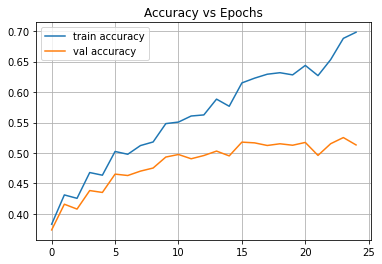

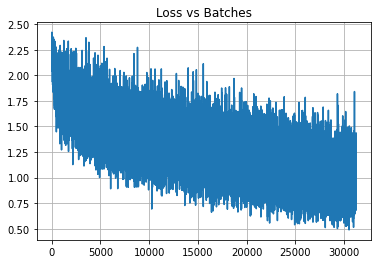

In [ ]:
# DO NOT EDIT
# Load Data
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(cifar10.load_data,[32,32,3],flatten=True)

# Network Configuration
network = []
lr=0.03
network.append(Dense(X_train.shape[1],128,learning_rate=lr))
network.append(ReLU())
network.append(Dense(128,256,learning_rate=lr))
network.append(ReLU())
network.append(Dense(256,512,learning_rate=lr))
network.append(ReLU())
network.append(Dense(512,10,learning_rate=lr))
# Intialize Model
model = MLP(n = network)
# Train Model
model.run(X_train,y_train,X_val,y_val)

In [ ]:
#TODO: Compute accuracy on the test data
test_acc = ...
print(test_acc)

0.5151


# Fashion MNIST

Epoch 25
Train accuracy: 0.93926
Val accuracy: 0.8926


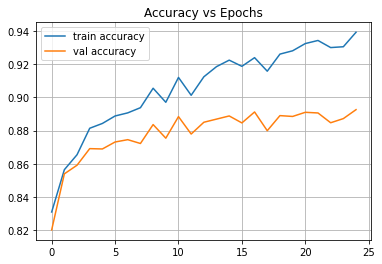

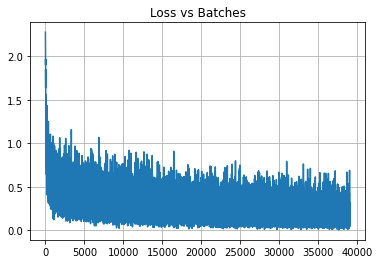

In [ ]:
# DO NOT EDIT
# Load Data
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(fashion_mnist.load_data,[28,28],flatten=True)

# Network Configuration
network = []
lr=0.03
network.append(Dense(X_train.shape[1],128,learning_rate=lr))
network.append(ReLU())
network.append(Dense(128,256,learning_rate=lr))
network.append(ReLU())
network.append(Dense(256,512,learning_rate=lr))
network.append(ReLU())
network.append(Dense(512,10,learning_rate=lr))
# Intialize Model
model = MLP(n = network)
# Train Model
model.run(X_train,y_train,X_val,y_val)

In [ ]:
#TODO: Compute accuracy on the test data
test_acc = ...
print(test_acc)

0.8836
